In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [44]:
bnkdat_df = pd.read_csv("banking_synthetic_data.csv")
bnkdat_df.head()

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,Male,49,10,Checking,894.23,Yes,No,No,No,No,Yes,No,No,No,Active
1,10002,Male,55,4,Savings,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,10003,Female,52,10,Checking,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,10004,Male,62,5,Checking,1084.61,Yes,No,No,No,No,No,Yes,No,No,Active
4,10005,Female,72,5,Savings,1188.77,No,No,No,No,No,No,No,No,No,Active


In [45]:
#check missing values
bnkdat_df.isnull().sum()
# no missing values

CustomerID                0
Sex                       0
Age                       0
AccountDuration           0
AccountType               0
AverageMonthlySpending    0
InvestmentAccounts        0
FixedDeposits             0
MutualFunds               0
StockInvestments          0
BondInvestments           0
BalancedFunds             0
TaxSavings                0
TradingAccounts           0
SpecialtyFunds            0
CustomerStatus            0
dtype: int64

In [46]:
all_mean_num_cols = bnkdat_df.select_dtypes(include='number').mean(skipna=False)
all_mean_num_cols

CustomerID                10425.500000
Age                          45.930588
AccountDuration               6.080000
AverageMonthlySpending     2249.351847
dtype: float64

In [47]:
# Numeric columns
#handle missing values.
bnkdat_df.fillna(all_mean_num_cols, inplace=True)
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,Male,49,10,Checking,894.23,Yes,No,No,No,No,Yes,No,No,No,Active
1,10002,Male,55,4,Savings,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,10003,Female,52,10,Checking,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,10004,Male,62,5,Checking,1084.61,Yes,No,No,No,No,No,Yes,No,No,Active
4,10005,Female,72,5,Savings,1188.77,No,No,No,No,No,No,No,No,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,Female,21,3,Checking,3186.52,No,No,No,No,No,No,No,No,No,Active
846,10847,Female,29,4,Savings,912.74,No,No,No,No,No,No,No,No,No,Active
847,10848,Female,18,7,Savings,1132.39,No,No,No,No,No,No,No,No,No,Active
848,10849,Male,50,6,Savings,1193.58,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Active


In [48]:
bnkdat_df.select_dtypes(exclude='number') #only categorical columns

,Sex,AccountType,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,Male,Checking,Yes,No,No,No,No,Yes,No,No,No,Active
1,Male,Savings,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,Female,Checking,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,Male,Checking,Yes,No,No,No,No,No,Yes,No,No,Active
4,Female,Savings,No,No,No,No,No,No,No,No,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
845,Female,Checking,No,No,No,No,No,No,No,No,No,Active
846,Female,Savings,No,No,No,No,No,No,No,No,No,Active
847,Female,Savings,No,No,No,No,No,No,No,No,No,Active
848,Male,Savings,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Active


In [49]:
all_categorical_cols = bnkdat_df.select_dtypes(exclude='number').mode() # Categorical columns
all_categorical_cols

,Sex,AccountType,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,Female,Savings,Yes,No,No,No,No,No,No,No,No,Active


In [50]:
# Numeric columns
# Task 1: Data Cleaning and Preprocessing
#handle missing values.
bnkdat_df.fillna(all_categorical_cols, inplace=True)
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,Male,49,10,Checking,894.23,Yes,No,No,No,No,Yes,No,No,No,Active
1,10002,Male,55,4,Savings,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,10003,Female,52,10,Checking,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,10004,Male,62,5,Checking,1084.61,Yes,No,No,No,No,No,Yes,No,No,Active
4,10005,Female,72,5,Savings,1188.77,No,No,No,No,No,No,No,No,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,Female,21,3,Checking,3186.52,No,No,No,No,No,No,No,No,No,Active
846,10847,Female,29,4,Savings,912.74,No,No,No,No,No,No,No,No,No,Active
847,10848,Female,18,7,Savings,1132.39,No,No,No,No,No,No,No,No,No,Active
848,10849,Male,50,6,Savings,1193.58,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Active


In [54]:
# 2. Convert Categorical Variables into numerical values.
bnkdat_df['Sex'] = LabelEncoder().fit_transform(bnkdat_df['Sex'])  # Male=1, Female=0
bnkdat_df['CustomerStatus'] = LabelEncoder().fit_transform(bnkdat_df['CustomerStatus'])  # Active=0, Inactive=1
bnkdat_df['AccountType'] = LabelEncoder().fit_transform(bnkdat_df['AccountType']) 
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,Yes,No,No,No,No,Yes,No,No,No,0
1,10002,1,0.545103,-0.934551,4,-0.939798,Yes,Yes,Yes,No,Yes,No,No,No,No,0
2,10003,0,0.364793,1.761269,0,0.649656,Yes,No,Yes,No,No,No,Yes,No,Yes,1
3,10004,1,0.965827,-0.485247,0,-0.769895,Yes,No,No,No,No,No,Yes,No,No,0
4,10005,0,1.566862,-0.485247,4,-0.701045,No,No,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,No,No,No,No,No,No,No,No,No,0
846,10847,0,-1.017587,-0.934551,4,-0.883501,No,No,No,No,No,No,No,No,No,0
847,10848,0,-1.678725,0.413359,4,-0.738312,No,No,No,No,No,No,No,No,No,0
848,10849,1,0.244586,-0.035944,4,-0.697866,Yes,Yes,Yes,Yes,Yes,No,No,No,No,0


In [55]:
# 3. Normalize Numerical Features . performing feature scaling on selected numeric columns
scaler = StandardScaler()
bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending']] = scaler.fit_transform(
    bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending']])

bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,Yes,No,No,No,No,Yes,No,No,No,0
1,10002,1,0.545103,-0.934551,4,-0.939798,Yes,Yes,Yes,No,Yes,No,No,No,No,0
2,10003,0,0.364793,1.761269,0,0.649656,Yes,No,Yes,No,No,No,Yes,No,Yes,1
3,10004,1,0.965827,-0.485247,0,-0.769895,Yes,No,No,No,No,No,Yes,No,No,0
4,10005,0,1.566862,-0.485247,4,-0.701045,No,No,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,No,No,No,No,No,No,No,No,No,0
846,10847,0,-1.017587,-0.934551,4,-0.883501,No,No,No,No,No,No,No,No,No,0
847,10848,0,-1.678725,0.413359,4,-0.738312,No,No,No,No,No,No,No,No,No,0
848,10849,1,0.244586,-0.035944,4,-0.697866,Yes,Yes,Yes,Yes,Yes,No,No,No,No,0


StandardScaler Formula
For each value x in a column:
z = \frac{x - \mu}{\sigma}
Where:
- \mu = mean of the column
- \sigma = standard deviation of the column
- z = standardized value


In [56]:
bnkdat_df.head()

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,Yes,No,No,No,No,Yes,No,No,No,0
1,10002,1,0.545103,-0.934551,4,-0.939798,Yes,Yes,Yes,No,Yes,No,No,No,No,0
2,10003,0,0.364793,1.761269,0,0.649656,Yes,No,Yes,No,No,No,Yes,No,Yes,1
3,10004,1,0.965827,-0.485247,0,-0.769895,Yes,No,No,No,No,No,Yes,No,No,0
4,10005,0,1.566862,-0.485247,4,-0.701045,No,No,No,No,No,No,No,No,No,0


In [57]:
bnkdat_df['InvestmentAccounts'] = LabelEncoder().fit_transform(bnkdat_df['InvestmentAccounts'])  # Male=1, Female=0
bnkdat_df['FixedDeposits'] = LabelEncoder().fit_transform(bnkdat_df['FixedDeposits'])  # Active=0, Inactive=1
bnkdat_df['MutualFunds'] = LabelEncoder().fit_transform(bnkdat_df['MutualFunds']) 
bnkdat_df['StockInvestments'] = LabelEncoder().fit_transform(bnkdat_df['StockInvestments']) 
bnkdat_df['BondInvestments'] = LabelEncoder().fit_transform(bnkdat_df['BondInvestments']) 
bnkdat_df['TaxSavings'] = LabelEncoder().fit_transform(bnkdat_df['TaxSavings']) 
bnkdat_df['TradingAccounts'] = LabelEncoder().fit_transform(bnkdat_df['TradingAccounts']) 
bnkdat_df['SpecialtyFunds'] = LabelEncoder().fit_transform(bnkdat_df['SpecialtyFunds'])
bnkdat_df['BalancedFunds'] = LabelEncoder().fit_transform(bnkdat_df['BalancedFunds'])
bnkdat_df 

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,0,1,0,0,0,0
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,1,0,0,0,0,0
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,0,0,1,0,1,1
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,0,0,1,0,0,0
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,0,0,0,0,0,0
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,0,0,0,0,0,0
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,0,0,0,0,0,0
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,1,0,0,0,0,0


In [ ]:
bnkdat_df

In [58]:
# 4. Feature Transformation
bnkdat_df['TotalInvestments'] = bnkdat_df[['InvestmentAccounts', 'FixedDeposits', 'MutualFunds', 'StockInvestments',
                             'BondInvestments', 'BalancedFunds', 'TaxSavings',
                             'TradingAccounts', 'SpecialtyFunds']].sum(axis=1)
bnkdat_df['TotalInvestments'] 
# 4. Feature Transformation

0      2
1      4
2      4
3      2
4      0
      ..
845    0
846    0
847    0
848    5
849    2
Name: TotalInvestments, Length: 850, dtype: int64

In [ ]:
# Task 2: Feature Engineering

# 1. Create Interaction Features
bnkdat_df['Age_AvgMonthlySpending'] = bnkdat_df['Age'] * bnkdat_df['AverageMonthlySpending']


In [ ]:
# 2. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(bnkdat_df[['AccountType']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['AccountType']))
bnkdat_df = pd.concat([bnkdat_df, poly_df], axis=1)

bnkdat_df
#generate column AccountType^2

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus,TotalInvestments,AccountType,AccountType^2
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,0,1,0,0,0,0,2,0.0,0.0
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,1,0,0,0,0,0,4,4.0,16.0
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,0,0,1,0,1,1,4,0.0,0.0
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,0,0,1,0,0,0,2,0.0,0.0
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,1,0,0,0,0,0,5,4.0,16.0


In [ ]:
# 3. Feature Binning - feature binning — a technique to convert continuous numeric data into categorical buckets

bnkdat_df['SpendingCategory'] = pd.cut(bnkdat_df['AverageMonthlySpending'], bins=[-np.inf, -0.5, 0.5, np.inf],
                                labels=['Low', 'Medium', 'High'])

🔹 pd.cut(...)
- This function bins continuous values into discrete intervals.
- It’s useful for creating categories like “Low”, “Medium”, “High” from a numeric column.
🔹 bnkdat_df['AverageMonthlySpending']
- The numeric column being binned — likely already standardized (mean = 0, std = 1).
🔹 bins=[-np.inf, -0.5, 0.5, np.inf]
np.inf - positive infinity
-np.inf - negative infinity
- Defines the edges of the bins:
- -np.inf to -0.5 → Low
- -0.5 to 0.5 → Medium
- 0.5 to np.inf → High
These thresholds assume the data is standardized. So values near 0 are average, below -0.5 are low, and above 0.5 are high.

🔹 labels=['Low', 'Medium', 'High']
- Assigns category names to each bin.
🔹 Assignment bnkdat_df['SpendingCategory'] = ...
- Creates a new column with the binned labels.


In [66]:
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus,TotalInvestments,AccountType,AccountType^2,SpendingCategory
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,0,1,0,0,0,0,2,0.0,0.0,Low
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,1,0,0,0,0,0,4,4.0,16.0,Low
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,0,0,1,0,1,1,4,0.0,0.0,High
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,0,0,1,0,0,0,2,0.0,0.0,Low
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,High
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0,Low
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0,Low
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,1,0,0,0,0,0,5,4.0,16.0,Low


In [71]:
bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending', 'InvestmentAccounts',
                                   'FixedDeposits', 'MutualFunds', 'StockInvestments', 'BondInvestments',
                                   'BalancedFunds', 'TaxSavings', 'TradingAccounts',
                                   'SpecialtyFunds']]

,Age,AccountDuration,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds
0,0.184482,1.761269,-0.895736,1,0,0,0,0,1,0,0,0
1,0.545103,-0.934551,-0.939798,1,1,1,0,1,0,0,0,0
2,0.364793,1.761269,0.649656,1,0,1,0,0,0,1,0,1
3,0.965827,-0.485247,-0.769895,1,0,0,0,0,0,1,0,0
4,1.566862,-0.485247,-0.701045,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,-1.498415,-1.383854,0.619469,0,0,0,0,0,0,0,0,0
846,-1.017587,-0.934551,-0.883501,0,0,0,0,0,0,0,0,0
847,-1.678725,0.413359,-0.738312,0,0,0,0,0,0,0,0,0
848,0.244586,-0.035944,-0.697866,1,1,1,1,1,0,0,0,0


In [67]:
# Task 3: Dimensionality Reduction: Number of components will depend on result. This is just an example

# Apply PCA
pca = PCA(n_components=2)
pca

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [68]:
pca_result = pca.fit_transform(bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending', 'InvestmentAccounts',
                                   'FixedDeposits', 'MutualFunds', 'StockInvestments', 'BondInvestments',
                                   'BalancedFunds', 'TaxSavings', 'TradingAccounts',
                                   'SpecialtyFunds']])
pca_result

array([[ 0.79144776,  0.12250921],
       [-0.36227138,  1.38181299],
       [ 1.74730301, -0.73403334],
       ...,
       [-1.3696695 , -0.87266484],
       [ 0.08049819,  0.71817483],
       [ 0.19644254, -0.03517995]], shape=(850, 2))

In [69]:
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.791448,0.122509
1,-0.362271,1.381813
2,1.747303,-0.734033
3,0.103823,1.326551
4,0.238109,1.638274
...,...,...
845,-1.691098,-1.004583
846,-1.769125,0.129613
847,-1.369670,-0.872665
848,0.080498,0.718175


Principal Component Analysis (PCA) — a powerful technique for simplifying high-dimensional data while preserving its structure
- You're creating a PCA object that will reduce your data to 2 principal components.
- These components are linear combinations of the original features that capture the maximum variance.
- You're applying PCA to a subset of columns:
  'Age', 'AccountDuration', 'AverageMonthlySpending', and various investment-related features.

- fit_transform does two things:
  - Fit: Learns the directions (principal components) that capture the most variance.
  - Transform: Projects the original data onto these directions.

  Think of it like rotating and flattening a cloud of points in 12D space down to 2D, while keeping the most meaningful structure

- You now have a new DataFrame with just two columns:
  - PC1: First principal component (captures most variance)
  - PC2: Second principal component (captures next most)

🧠 Analogy: PCA as a Camera Angle
Imagine you're photographing a sculpture:
- From the front, you see the most detail (PC1).
- From the side, you get a different but still meaningful view (PC2).
- You ignore other angles that add little new information.



In [72]:
# Save the cleaned dataset and reports
bnkdat_df.to_csv('cleaned_bank_data.csv', index=False)
df_pca.to_csv('pca_results_bank_data.csv', index=False)

print("Data cleaning, feature engineering, and dimensionality reduction completed. Results saved.")

Data cleaning, feature engineering, and dimensionality reduction completed. Results saved.


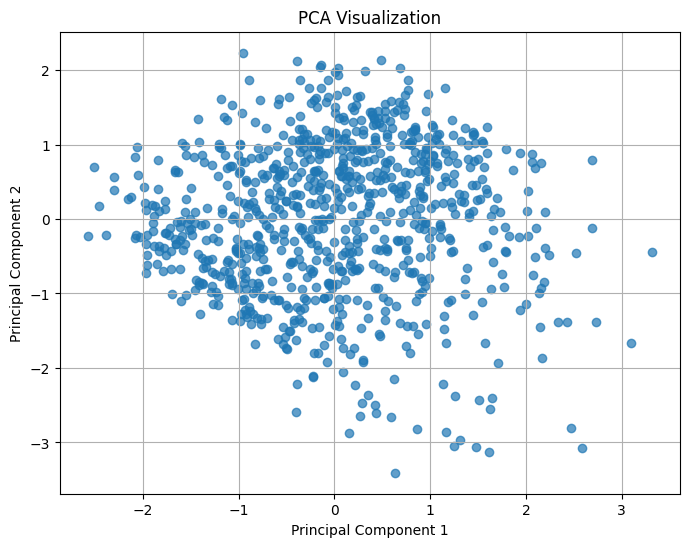

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()
